# 抽样分布-S公司玩具公司如何确定订货量抽样分布

## （1）需求量近似服从的正态分布函数是什么？

In [10]:
# 天气熊的需求量近似服从均值为20000只的正态分布，并且在10000只到30000只之间的概率为0.95
from scipy.stats import norm
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt

# 设置置信水平
confidence_level = 0.95

lower_bound = 10000
upper_bound = 30000
# 将样本均值估计为均值（mean)
mean = 20000

# 求Z分数
z_score = norm.ppf(confidence_level)
print(f"Z分数:{z_score:.4f}")

# 求标准差
sigma = (upper_bound - mean)/z_score
print(f"标准差:{sigma:.4f}")
print('因此需求量近似服从 均值为20000，标准差为',f'{sigma:.4f}', '的正态分布概率密度函数')


Z分数:1.6449
标准差:6079.5683
因此需求量近似服从 均值为20000，标准差为 6079.5683 的正态分布概率密度函数


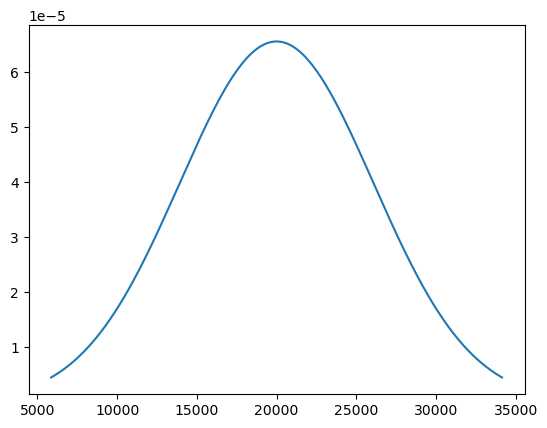

In [11]:
dist = norm(mean, sigma) # 创建正态分布对象
x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 200) # 设置自变量x的范围
y = norm.pdf(x, mean, sigma)
plt.plot(x, y) # 绘制概率密度函数图像

## （2）公司管理团队成员所推荐的各种订货量的存货出清概率分别是多少？

In [12]:
D = [15000, 18000, 24000, 28000]
print('订货量分别为15000只、18000只、24000只和28000只时存货出清概率为:', end = ' ')
cdf_value = ','.join([f'{norm.cdf(d,mean, sigma):.4f}' for d in D])
print(cdf_value)


订货量分别为15000只、18000只、24000只和28000只时存货出清概率为: 0.2054,0.3711,0.7447,0.9059


## （3）S公司的一名经理认为，产品的潜在利润很高，因此建议订货应该以70%的概率保证满足市场需求，仅需以30%的概率出现脱销。根据该经理的建议，天气熊的订货量应该是多少？

In [13]:
confidence_level = 0.70
z_score = norm.ppf(confidence_level)
x = mean + z_score*sigma
print("根据该经理的建议，天气熊的订货量应该是:", round(x), "只")

根据该经理的建议，天气熊的订货量应该是: 23188 只



## （4）关于最优订货量的建议可能各种各样。单周期库存模型可提供如何找到最优解决方案的建议。根据单周期库存模型，获得最大预期利润的订货量Q^*满足：P{Demand≤Q^*}=c_u/(c_u+c_o )，其中，P{Demand≤Q^*}为需求量Demand不大于订货量Q^*的概率，c_u为订货量少于需求量的单位损失（因缺货失去销售而造成损失），c_o为订货量超过需求量的单位损失（因未售出产生库存而造成损失）。根据单周期库存模型，天气熊的订货量应该是多少？

In [14]:
# 每个天气熊的成本为16元，S公司希望以24元的价格出售。如果节日过后仍有存货，S公司将以每只5元的价格清仓销售。
c_u = 24 - 16
c_o = 16 - 5
P = c_u/(c_u + c_o)
z_score = norm.ppf(P)
Q = mean + z_score*sigma
print('天气熊的订货量应该是', round(Q), '只')

天气熊的订货量应该是 18789 只
